In [8]:
! pip install matplotlib
! pip install pandas
! pip install nxontology

import nxontology as nxo
import load_and_manipulates_triples as triples
import pandas as pd
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
iricpath = '/home/elliot/Desktop/StageM2/data/iric/iric.tsv'

iric = pd.read_csv(iricpath, sep='\t')
display(iric)

,subject,predicate,object
0,GO:0000001,is_a,GO:0048311
1,GO:0000001,is_a,GO:0048308
2,GO:0000002,is_a,GO:0007005
3,GO:0000003,is_a,GO:0008150
4,GO:0000006,is_a,GO:0005385
...,...,...,...
1452516,OsNippo12g255000,interacts_with,OsNippo07g025800
1452517,OsNippo12g255000,interacts_with,OsNippo07g207000
1452518,OsNippo12g255000,interacts_with,OsNippo07g207600
1452519,OsNippo12g255000,interacts_with,OsNippo10g150350


{'is_a', 'interacts_with', 'gene ontology', 'prints', 'trait ontology', 'prosite_patterns', 'plant ontology', 'prosite_profiles', 'superfamily', 'panther'}
{'is_a': 71877, 'interacts_with': 1120849, 'gene ontology': 169248, 'prints': 4365, 'trait ontology': 15080, 'prosite_patterns': 6677, 'plant ontology': 6125, 'prosite_profiles': 12239, 'superfamily': 20742, 'panther': 25319}


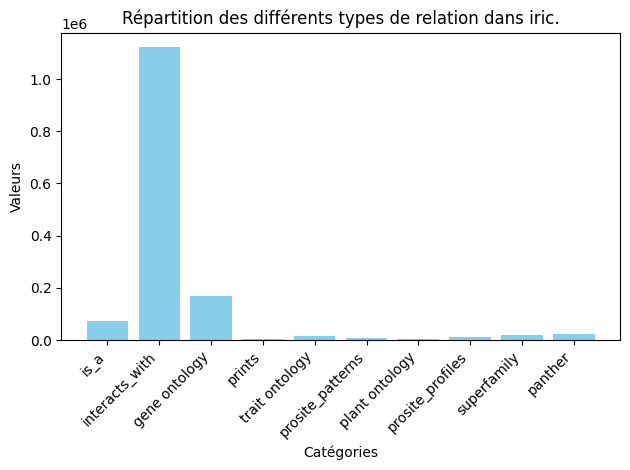

In [10]:
predicates = iric['predicate']
existing_relations=set(predicates)
print(existing_relations)
predicates_types_count:dict={}

for predicate_type in existing_relations:
    predicates_types_count[predicate_type]=0


for predicate in predicates:
    predicates_types_count[predicate]+=1

print(predicates_types_count)

categories = list(predicates_types_count.keys())
values = list(predicates_types_count.values())
# Créer le diagramme à barres
# plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')
plt.xlabel('Catégories')
plt.ylabel('Valeurs')
plt.title('Répartition des différents types de relation dans iric.')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le diagramme
plt.show()

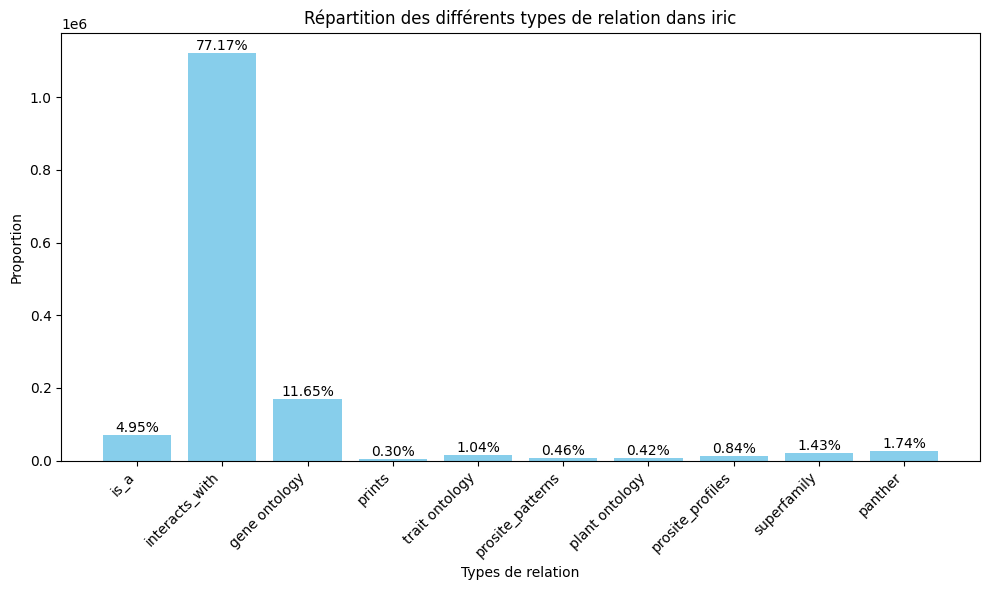

In [11]:
# Calculer le total des valeurs
total_values = sum(values)

# Calculer les pourcentages de chaque catégorie
percentages = [(value / total_values) * 100 for value in values]

# Créer le diagramme à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color='skyblue')

# Ajouter les pourcentages au-dessus de chaque barre
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xlabel('Types de relation')
plt.ylabel('Proportion')
plt.title('Répartition des différents types de relation dans iric')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Afficher le diagramme
plt.show()

In [12]:
from nxontology.imports import from_file

url = "https://purl.obolibrary.org/obo/go/go-basic.json.gz"
nxo = from_file(url)
nxo.n_nodes
nxo.freeze()

sim = nxo.similarity("GO:0042552", "GO:0022008")
print(sim.lin)

0.2192899709501581


In [26]:
similarities, other = [], []

for entity in iric['subject']:
    try : 
        similarities.append(nxo.similarity(entity, "GO:0022008").lin)
    except :
        other.append(entity)

Mesure de similarité disponible dans 4.65 % des cas.
Nombre de mesure de similarité obtenues : 67577
Lin-similarité max : 1.0


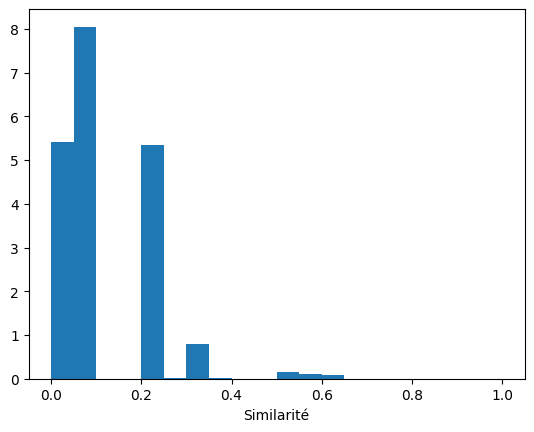

In [27]:
print(f"Mesure de similarité disponible dans {round((len(similarities)/(len(similarities)+len(other)))*100,2)} % des cas.")
print(f"Nombre de mesure de similarité obtenues : {len(similarities)}")
print(f"Lin-similarité max : {max(similarities)}")

plt.hist(similarities, density=True, bins=20)  # density=False would make counts
plt.ylabel('')
plt.xlabel('Similarité');

In [14]:
# Un premier essaie sur interacts_with

interactswith_heads_count:dict = {} # keys are entities, values are number of times each entity is head
interactswith_tails_count:dict = {} # keys are entities, values are number of times each entity is tail

for entity in iric['subject']:
    interactswith_heads_count[entity]=0
for entity in iric['object']:
    interactswith_tails_count[entity]=0

for index, row in iric.iterrows():
    if row['predicate'] == 'interacts_with':
        interactswith_heads_count[row['subject']]+=1
        interactswith_tails_count[row['object']]+=1

KeyboardInterrupt: 

In [ ]:
all_heads = set(iric['subject'])
all_tails = set(iric['object'])

